In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import numpy as np


In [2]:
# dealing with large dataset
# requires conda install -c conda-forge vegafusion vegafusion-python-embed vl-convert-python
# alt.data_transformers.enable("vegafusion")
# alt.renderers.enable("jupyter")

In [3]:
data = pd.read_csv("data/trip_data.csv")
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,D12017792176FC91,classic_bike,2024-04-18 19:27:58.000,2024-04-18 19:40:03.000,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,Lansdowne T Stop,B32058,42.336244,-71.087986,42.347345,-71.100168,casual,12.083333
1,CC6B7E9F52C9D800,classic_bike,2024-04-18 19:27:27.000,2024-04-18 19:40:05.000,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,Lansdowne T Stop,B32058,42.336244,-71.087986,42.347345,-71.100168,casual,12.633333
2,B7C337DA1E3C2F41,classic_bike,2024-04-28 20:08:18.000,2024-04-28 20:35:01.000,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,Lansdowne T Stop,B32058,42.336244,-71.087986,42.347345,-71.100168,casual,26.716667
3,AD55618ACFEEF457,classic_bike,2024-04-20 20:26:50.000,2024-04-20 20:50:28.000,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,Forest Hills,E32010,42.336244,-71.087986,42.300923,-71.114249,member,23.633333
4,F74A811DEB86DCFA,classic_bike,2024-04-10 09:20:50.000,2024-04-10 09:34:35.000,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,Mass Ave at Albany St,M32061,42.336244,-71.087986,42.361358,-71.096703,member,13.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17809,A61F7F0634507275,classic_bike,2024-12-06 20:40:00.535,2024-12-06 20:42:29.019,Parker St at Huntington Ave,Z32997,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,42.338488,-71.092611,42.336244,-71.087986,member,2.474733
17810,6F8771E3074F8EB4,classic_bike,2024-12-23 06:45:43.301,2024-12-23 06:52:44.370,Forsyth St at Huntington Ave,B32062,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,42.339202,-71.090511,42.336244,-71.087986,member,7.017817
17811,61485A6E556AF722,classic_bike,2024-12-13 12:46:09.628,2024-12-13 13:04:28.930,Forsyth St at Huntington Ave,B32062,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,42.339202,-71.090511,42.336244,-71.087986,casual,18.321700
17812,0C1307ADC379893E,classic_bike,2024-12-04 12:56:13.908,2024-12-04 13:01:50.338,Parker St at Huntington Ave,Z32997,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,B32002,42.338488,-71.092611,42.336244,-71.087986,member,5.607167


In [4]:
apr = data[data["started_at"].str.contains("2024-04")]
sept = data[data["started_at"].str.contains("2024-09")]
dec = data[data["started_at"].str.contains("2024-12")]
print(apr.shape, sept.shape, dec.shape)

(6061, 14) (9281, 14) (2470, 14)


In [5]:
stations = pd.read_csv("data/current_bluebikes_stations.csv")
stations

,Number,NAME,Lat,Long,Seasonal Status,Municipality,Total Docks,Station ID (to match to historic system data)
0,L32001,Railroad Lot and Minuteman Bikeway,42.416065,-71.153366,Year Round,Arlington,11.0,461
1,L32002,Linwood St at Minuteman Bikeway,42.409354,-71.149065,Year Round,Arlington,11.0,462
2,L32005,Thorndike Field at Minuteman Bikeway,42.400168,-71.144570,Year Round,Arlington,11.0,480
3,L32003,Mass Ave at Grafton St,42.407261,-71.143821,Winter Storage,Arlington,11.0,464
4,L32004,Broadway at Grafton St,42.409942,-71.140093,Winter Storage,Arlington,11.0,465
...,...,...,...,...,...,...,...,...
486,TBD - upcoming install,Arsenal on the Charles,42.363494,-71.164216,NaN,Watertown,NaN,No ID pre-March 2023
487,TBD - upcoming install,Damrell St at Old Colony Ave,42.332397,-71.054415,NaN,Boston,NaN,No ID pre-March 2023
488,TBD - upcoming install,Melnea Cass Blvd at Hampden St,42.330960,-71.075488,NaN,Boston,NaN,No ID pre-March 2023
489,TBD - upcoming install,West Street,42.403517,-71.063277,NaN,Everett,NaN,No ID pre-March 2023


<Axes: >

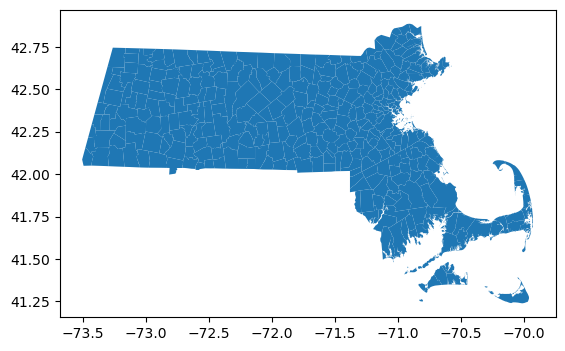

In [6]:
mass = gpd.read_file("data/townssurvey_shp/TOWNSSURVEY_POLYM.shp")
mass = mass.to_crs("EPSG:4326")
mass.plot()

In [7]:

mass

,TOWN,TOWN_ID,TYPE,COUNTY,FIPS_STCO,FOURCOLOR,POP1960,POP1970,POP1980,POP1990,POP2000,POP2010,POP2020,POPCH10_20,AREA_ACRES,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry
0,TOLLAND,297,T,HAMPDEN,25013,3,101,172,235,289,426,485,471,-14,20999.966,32.812,38616.445183,8.498383e+07,"POLYGON ((-73.07087 42.14818, -73.03492 42.143..."
1,CANTON,50,T,NORFOLK,25021,4,12771,17100,18182,18530,20775,21561,24370,2809,12489.087,19.514,33538.192926,5.060814e+07,"POLYGON ((-71.13066 42.22782, -71.11419 42.212..."
2,MASHPEE,172,T,BARNSTABLE,25001,4,867,1288,3700,7884,12946,14006,15060,1054,16384.791,25.601,95479.258305,6.627629e+07,"MULTIPOLYGON (((-70.47588 41.67675, -70.48217 ..."
3,LYNNFIELD,164,T,ESSEX,25009,4,8398,10826,11267,11274,11542,11596,13000,1404,6683.367,10.443,27878.230478,2.704235e+07,"POLYGON ((-71.05468 42.57380, -71.05452 42.573..."
4,BARNSTABLE,20,TC,BARNSTABLE,25001,3,13465,19842,30898,40949,47821,45193,48916,3723,40077.809,62.622,233289.285937,1.622204e+08,"MULTIPOLYGON (((-70.38145 41.73987, -70.38121 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,STOUGHTON,285,T,NORFOLK,25021,3,16328,23459,26710,26777,27149,26962,29281,2319,10537.857,16.465,31385.419618,4.264484e+07,"POLYGON ((-71.05651 42.15382, -71.06385 42.140..."
347,CHATHAM,55,T,BARNSTABLE,25001,4,3273,4554,6071,6579,6625,6125,6594,469,10906.542,17.043,151757.308105,4.413718e+07,"MULTIPOLYGON (((-69.97128 41.71962, -69.97126 ..."
348,WEST BOYLSTON,321,T,WORCESTER,25027,4,5526,6369,6204,6611,7481,7669,7877,208,8872.450,13.863,30912.773965,3.590557e+07,"POLYGON ((-71.81777 42.40395, -71.78655 42.398..."
349,HINGHAM,131,T,PLYMOUTH,25023,3,15378,18845,20339,19821,19882,22157,24284,2127,14557.633,22.747,60681.816857,5.875640e+07,"MULTIPOLYGON (((-70.87977 42.27416, -70.87967 ..."


<Axes: >

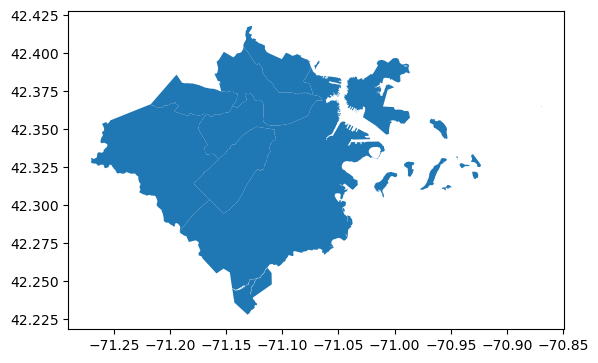

In [8]:
TOWNS = ["BOSTON", "BROOKLINE", "NEWTON", "CAMBRIDGE", "WATERTOWN", "SOMERVILLE"]

map = mass[mass["TOWN"].isin(TOWNS)]

map.plot()
# plt.scatter(stations["Long"], stations["Lat"])


In [9]:
start = stations[stations["NAME"] == "Ruggles T Stop - Columbus Ave at Melnea Cass Blvd"]
start

,Number,NAME,Lat,Long,Seasonal Status,Municipality,Total Docks,Station ID (to match to historic system data)
42,B32002,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,Year Round,Boston,26.0,12


In [10]:
trips1 = data[data["start_station_name"] == "Ruggles T Stop - Columbus Ave at Melnea Cass Blvd"]
trips1 = trips1.groupby(["end_station_id", "end_lng", "end_lat"]).size().reset_index(name="count")
trips1["count_log"] = trips1["count"].apply(np.log10)
print(trips1["count"].mean())
print(trips1["count_log"].mean())
trips1

28.71746031746032
0.9215249439142976


,end_station_id,end_lng,end_lat,count,count_log
0,A32000,-71.044571,42.353391,1,0.000000
1,A32001,-71.137313,42.353334,4,0.602060
2,A32002,-71.119035,42.351692,43,1.633468
3,A32003,-71.108279,42.350406,19,1.278754
4,A32004,-71.106500,42.338629,86,1.934498
...,...,...,...,...,...
310,V32016,-71.047314,42.403369,2,0.301030
311,W32004,-71.157649,42.362774,2,0.301030
312,Z32997,-71.092611,42.338488,30,1.477121
313,Z32998,-71.087386,42.364127,18,1.255273


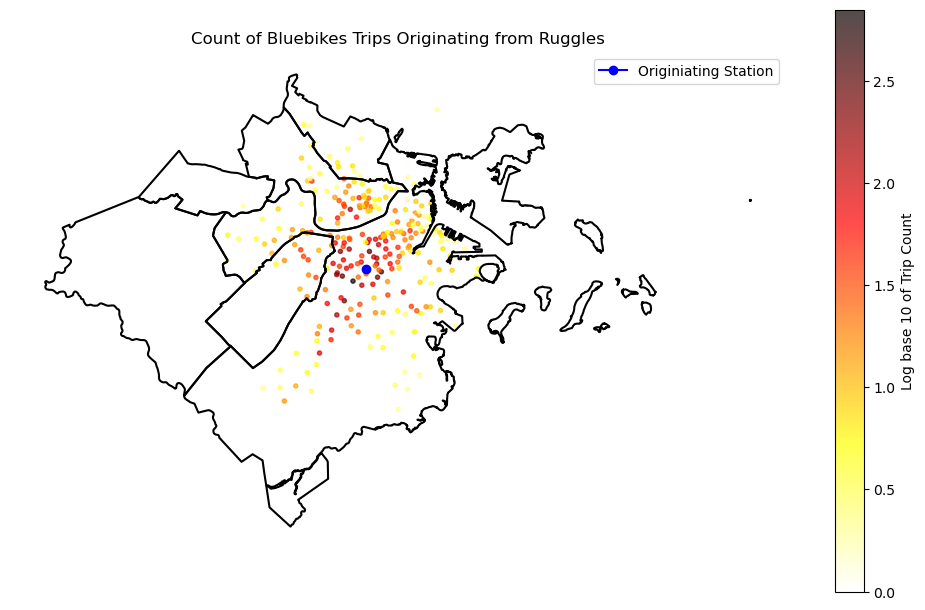

In [11]:

fig, ax = plt.subplots(figsize = (10, 10))
map.boundary.plot(ax = ax, facecolor = "none", color = "black")
s1 = ax.scatter(trips1["end_lng"], trips1["end_lat"], marker = ".", alpha = 0.7, c = trips1["count_log"], cmap = "hot_r")
ax.plot(start["Long"], start["Lat"], marker = "o", color = "blue", label = "Originiating Station")
plt.colorbar(s1, ax = ax, label = "Log base 10 of Trip Count", shrink = 0.6)
plt.axis("off")
plt.title("Count of Bluebikes Trips Originating from Ruggles")
plt.tight_layout()
plt.legend()



In [12]:
trips2 = data[data["end_station_name"] == "Ruggles T Stop - Columbus Ave at Melnea Cass Blvd"]
trips2 = trips2.groupby(["start_station_id", "start_lng", "start_lat"]).size().reset_index(name="count")
trips2["count_log"] = trips2["count"].apply(np.log10)
trips2

,start_station_id,start_lng,start_lat,count,count_log
0,A32000,-71.044571,42.353391,4,0.602060
1,A32000,-71.044537,42.353364,1,0.000000
2,A32000,-71.044531,42.353380,1,0.000000
3,A32001,-71.137313,42.353334,13,1.113943
4,A32001,-71.137172,42.353419,1,0.000000
...,...,...,...,...,...
1339,Z32997,-71.092825,42.338365,1,0.000000
1340,Z32997,-71.092717,42.338189,1,0.000000
1341,Z32997,-71.092611,42.338488,30,1.477121
1342,ZZ32996,-71.126081,42.417591,2,0.301030


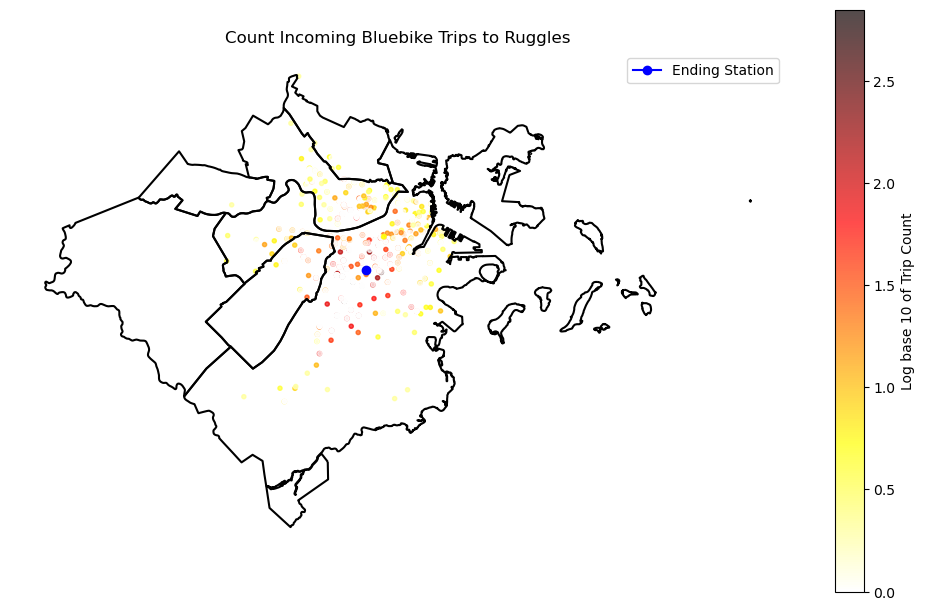

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
map.boundary.plot(ax = ax, facecolor = "none", color = "black")
s = ax.scatter(trips2["start_lng"], trips2["start_lat"], marker = ".", alpha = 0.7, c = trips2["count_log"], cmap = "hot_r")
ax.plot(start["Long"], start["Lat"], marker = "o", color = "blue", label = "Ending Station")
plt.colorbar(s, ax = ax, label = "Log base 10 of Trip Count", shrink = 0.6)
plt.axis("off")
plt.title("Count Incoming Bluebike Trips to Ruggles")
plt.tight_layout()
plt.legend()

In [14]:
x_binding = alt.binding_radio(
    name='Select Category: ',
    options=['rideable_type', 'member_casual']
)

param = alt.param(name='xvar', bind=x_binding, value='rideable_type')

box_plot = alt.Chart(dec).mark_boxplot(outliers = {"size": 3}).encode(
    x=alt.X('x:O', title='Selected Category'),
    y=alt.Y('duration:Q', title='Duration')
).transform_calculate(
    x='datum[xvar]'
).add_params(
    param
).properties(
    width=500,
    height=300
)
box_plot

alt.Chart(...)

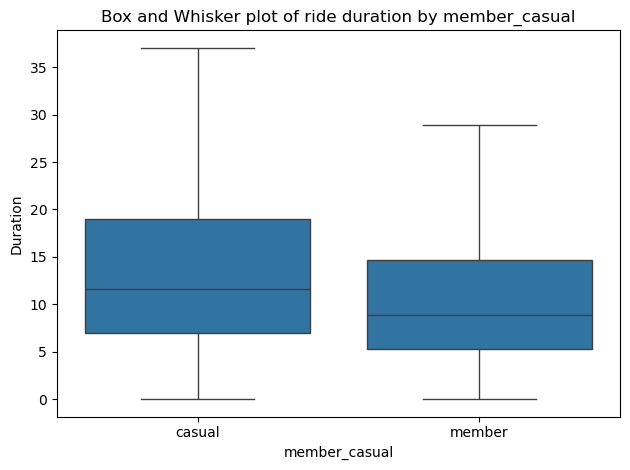

In [15]:
def category_hist(x):
    sns.boxplot(x = data[x], y = data["duration"], showfliers = False)
    plt.xlabel(x)
    plt.ylabel("Duration")
    plt.title(f"Box and Whisker plot of ride duration by {x}")
    plt.tight_layout()
    return fig

category_hist("member_casual")
plt.show()


In [16]:
import pandas as pd
import altair as alt

data = pd.read_csv("data/trip_data.csv")

# Convert timestamp and extract month
data['started_at'] = pd.to_datetime(data['started_at'])
data['month'] = data['started_at'].dt.to_period('M').astype(str)

# Prepare subsets
bike_type_counts = data.groupby(['month', 'rideable_type']).size().reset_index(name='count')
bike_type_counts['category'] = 'Bike Type'
bike_type_counts = bike_type_counts.rename(columns={'rideable_type': 'subcategory'})

member_type_counts = data.groupby(['month', 'member_casual']).size().reset_index(name='count')
member_type_counts['category'] = 'Member Type'
member_type_counts = member_type_counts.rename(columns={'member_casual': 'subcategory'})

avg_duration = data.groupby('month')['duration'].mean().reset_index(name='count')
avg_duration['category'] = 'Average Duration'
avg_duration['subcategory'] = 'Average Duration'

# Combine all
combined_df = pd.concat([bike_type_counts, member_type_counts, avg_duration], ignore_index=True)

# Create selection param (Altair v5)
category_selector = alt.param(
    name='CategorySelector',
    bind=alt.binding_select(options=['Bike Type', 'Member Type', 'Average Duration'], name='Y Axis: '),
    value='Bike Type'
)

# Filtered chart
chart = alt.Chart(combined_df).transform_filter(
    alt.datum.category == category_selector
).mark_bar().encode(
    x=alt.X('month:N', title='Month'),
    y=alt.Y('count:Q', title='Value'),
    color=alt.Color('subcategory:N', title='Subcategory'),
    tooltip=['month', 'subcategory', 'count']
).add_params(
    category_selector
).properties(
    width=600,
    height=400,
    title='Monthly Trip Data'
)

chart


alt.Chart(...)

In [17]:
# hour_data = data.copy()
# hour_data["hour"] = hour_data["started_at"].dt.hour
# for month in hour_data["started_at"].dt.month.unique():
#     month_data = hour_data[hour_data["started_at"].dt.month == month]
#     grouped = month_data.groupby("hour").size().reset_index(name="count")
#     grouped.to_csv(f"app/js/hourly_data_{month}.csv", index=False)

# Creates ride counts by hour used in d3 plot

In [18]:
import plotly.graph_objects as go

df = pd.read_csv("data/trip_data.csv")

# Preprocess the data
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["month"] = df["started_at"].dt.month_name()
df["manhattan_distance"] = abs(df["start_lat"] - df["end_lat"]) + abs(df["start_lng"] - df["end_lng"])

# Valid months to visualize
valid_months = ["April", "September", "December"]
df_filtered = df[df["month"].isin(valid_months)]

# Create one pair of box plots (classic + electric) per month
fig = go.Figure()
visibility_map = []

for month in valid_months:
    month_data = df_filtered[df_filtered["month"] == month]
    visible = month == "April"  # Only April shown initially

    for bike_type in ["classic_bike", "electric_bike"]:
        data = month_data[month_data["rideable_type"] == bike_type]
        fig.add_trace(
            go.Box(
                y=data["manhattan_distance"],
                name=bike_type.replace("_", " ").title(),
                boxpoints="outliers",
                marker=dict(size=4),
                visible=visible
            )
        )
    visibility_map.append([month == m for m in valid_months for _ in range(2)])

# Add dropdown for month selection
fig.update_layout(
    title="Distribution of Manhattan Distances - April",
    yaxis_title="Manhattan Distance",,
    updatemenus=[
        dict(
            buttons=[
                dict(label=month,
                     method="update",
                     args=[
                         {"visible": vis},
                         {"title": f"Distribution of Manhattan Distances - {month}"}
                     ])
                for month, vis in zip(valid_months, visibility_map)
            ],
            direction="down",
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Save to embeddable HTML snippet
# fig.write_html("boxplot_month_dropdown.html", include_plotlyjs=False, full_html=False)
fig.show()

SyntaxError: invalid syntax (3146744964.py, line 39)

In [ ]:
# Re-create the figure using pastel1 color scheme for consistency
import plotly.express as px
import plotly.colors as pc


df = pd.read_csv("data/trip_data.csv")

# Preprocess the data
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["month"] = df["started_at"].dt.month_name()
df["manhattan_distance"] = abs(df["start_lat"] - df["end_lat"]) + abs(df["start_lng"] - df["end_lng"])
valid_months = ["April", "September", "December"]
df_filtered = df[df["month"].isin(valid_months)]


# Define pastel1 colors for bike types
color_map = {"classic_bike": pc.qualitative.Pastel1[0], "electric_bike": pc.qualitative.Pastel1[1]}

fig = go.Figure()
visibility_map = []

for month in valid_months:
    month_data = df_filtered[df_filtered["month"] == month]
    visible = month == "April"

    for bike_type in ["classic_bike", "electric_bike"]:
        data = month_data[month_data["rideable_type"] == bike_type]
        fig.add_trace(
            go.Box(
                y=data["manhattan_distance"],
                name=bike_type.replace("_", " ").title(),
                boxpoints="outliers",
                marker_color=color_map[bike_type],
                visible=visible
            )
        )
    visibility_map.append([month == m for m in valid_months for _ in range(2)])


fig.update_layout(
    title="Distribution of Manhattan Distances",
    yaxis_title="Calculated Manhattan Distance",
    updatemenus=[
        dict(
            buttons=[
                dict(label=month,
                     method="update",
                     args=[
                         {"visible": vis},
                         {"title": f"Distribution of Manhattan Distances - {month}"}
                     ])
                for month, vis in zip(valid_months, visibility_map)],
            direction="down",
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.15,
            yanchor="top")])

fig.show()
fig.write_html("viz4_plotly.html", include_plotlyjs='cdn', full_html=False)